In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import rc        # TO MANAGE MATPLOTLIB PARAMETERS"
rc('font',family='serif')
rc('text',usetex = True)

import scipy.optimize as optimization

In [100]:
nu,eV,Sy,Br,IC,pp,CD,Refl,Tot = np.loadtxt('lum.txt',unpack=True)
AGN_nu = [1.0e10,1.0e22]
AGN_eV = np.log10(np.array(AGN_nu)/2.418e14)
AGN_nu = np.log10(AGN_nu)
BXB_nu = [1.0e14,1.0e21]
BXB_eV = np.log10(np.array(BXB_nu)/2.418e14)
BXB_nu = np.log10(BXB_nu)
AGN = [37,44]
BXB = [32,38]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


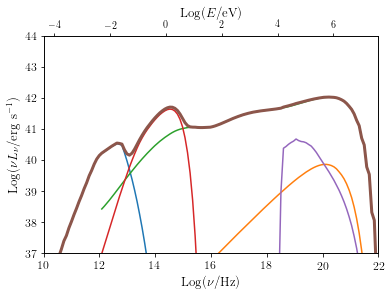

In [102]:
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

ax1.tick_params(axis='both', labelsize=12)
ax1.set_xlim(AGN_nu)
ax1.set_ylim(AGN)
ax1.set_xlabel(r'$\mathrm{Log}(\nu/\mathrm{Hz})$',fontsize=13)
ax1.xaxis.set_label_position('bottom')

ax2.set_xlabel(r'$\mathrm{Log}(E/\mathrm{eV})$',fontsize=13)
ax2.xaxis.set_label_position('top')
ax2.set_xlim(AGN_eV)

ax1.set_ylabel(r'$\mathrm{Log}(\nu L_\nu / \mathrm{erg~s}^{-1})$',fontsize=13)

ax1.plot(np.log10(nu),np.log10(Sy),label='Sy')
ax1.plot(np.log10(nu),np.log10(Br),label='Br')
ax1.plot(np.log10(nu),np.log10(IC),label='IC')
ax1.plot(np.log10(nu),np.log10(CD),label='Cold Disk')
ax1.plot(np.log10(nu),np.log10(Refl),label='Reflection')
ax1.plot(np.log10(nu),np.log10(Tot+CD+Refl),lw=3,label='Tot')

fig.savefig('lum.pdf')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


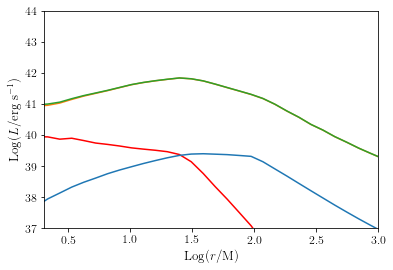

In [107]:
r,Sy,Br,IC,pp,Tot = np.loadtxt('lumRadius.txt',unpack=True)

fig, ax = plt.subplots()

ax.tick_params(axis='both', labelsize=12)
ax.set_xlim([0.3,3.0])
ax.set_ylim(AGN)
ax.set_xlabel(r'$\mathrm{Log}(r/\mathrm{M})$',fontsize=13)
ax.xaxis.set_label_position('bottom')

ax.set_ylabel(r'$\mathrm{Log}(L / \mathrm{erg~s}^{-1})$',fontsize=13)

ax.plot(np.log10(r),np.log10(Sy),c='r')
ax.plot(np.log10(r),np.log10(Br),label='Br')
ax.plot(np.log10(r),np.log10(IC),label='IC')
ax.plot(np.log10(r),np.log10(Sy+Br+IC),label='Tot')

fig.savefig('lumRadius.pdf')

In [108]:
J,Sy,Br,IC,CD,Tot = np.loadtxt('photonDensity.txt',unpack=True,skiprows=4)

In [89]:
def linearPol(x,a,b):
    return a+b*x
def quadPol(x,a,b,c):
    return a+(b+c*x)*x
def cubePol(x,a,b,c,d):
    return a+(b+(c+d*x)*x)*x
def pol4(x,a,b,c,d,e):
    return a+(b+(c+(d+e*x)*x)*x)*x
def pol5(x,a,b,c,d,e,f):
    return a+(b+(c+(d+(e+f*x)*x)*x)*x)*x
def smoothBrokenPLwEC(x,A,a1,a2,vB,vC):
    return A-a1*(x-vB)-np.log10(1+np.power(10,(a2-a1)*(x-vB)))-np.power(10,x-vC)/np.log(10)
def smoothBrokenPLw2EC(x,A,a1,a2,vB,vClf,vChf):
    return A-a1*(x-vB)-np.log10(1+np.power(10,(a2-a1)*(x-vB)))-(np.power(10,x-vChf)+np.power(10,vClf-x))/np.log(10)

In [155]:
IC[70:170]

array([3.54e+38, 3.24e+38, 2.96e+38, 2.69e+38, 2.44e+38, 2.20e+38,
       1.98e+38, 1.77e+38, 1.57e+38, 1.39e+38, 1.22e+38, 1.06e+38,
       9.17e+37, 7.86e+37, 6.67e+37, 5.59e+37, 4.63e+37, 3.79e+37,
       3.06e+37, 2.45e+37, 1.94e+37, 1.53e+37, 1.18e+37, 9.00e+36,
       6.74e+36, 4.95e+36, 3.56e+36, 2.51e+36, 1.75e+36, 1.19e+36,
       7.88e+35, 5.14e+35, 3.32e+35, 2.10e+35, 1.30e+35, 7.78e+34,
       4.49e+34, 2.71e+34, 1.68e+34, 1.07e+34, 6.88e+33, 4.55e+33,
       3.20e+33, 2.33e+33, 1.73e+33, 1.29e+33, 9.71e+32, 7.29e+32,
       5.44e+32, 4.04e+32, 2.98e+32, 2.18e+32, 1.58e+32, 1.14e+32,
       8.14e+31, 5.76e+31, 4.04e+31, 2.81e+31, 1.95e+31, 1.33e+31,
       9.07e+30, 6.11e+30, 4.09e+30, 2.72e+30, 1.80e+30, 1.19e+30,
       7.88e+29, 5.19e+29, 3.42e+29, 2.26e+29, 1.52e+29, 1.03e+29,
       7.01e+28, 4.82e+28, 3.34e+28, 2.33e+28, 1.65e+28, 1.17e+28,
       8.28e+27, 5.86e+27, 4.16e+27, 2.94e+27, 2.06e+27, 1.43e+27,
       9.89e+26, 6.76e+26, 4.54e+26, 3.00e+26, 1.92e+26, 1.21e

In [179]:
energyIC = np.log10(J[70:160])
ICa = np.log10(IC[70:160])
oIC = optimization.curve_fit(smoothBrokenPLw2EC,energyIC,ICa,p0=(37.5,0.5,2,-18.5,-22,-17))
oIC

/home/luciano/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 37.94833135,   0.38324262,   1.80416884, -18.96888052,
        -32.6558855 ,  -2.46722522]), array([[inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf]]))

In [133]:
energySy = np.log10(J[0:80])
Sya = np.log10(Sy[0:80])
oSy = optimization.curve_fit(smoothBrokenPLwEC,energySy,Sya,p0=(41.5,-1.0,0.5,-21,-20.5))
oSy

(array([ 42.14300162,  -0.97646921,   2.05013547, -20.70519361,
        -20.51812832]),
 array([[ 1.68950997e-04, -2.33259876e-05,  2.08803447e-04,
          7.50642102e-05, -3.83163721e-05],
        [-2.33259876e-05,  1.59950267e-05,  1.97799703e-04,
          2.99288506e-05,  2.61980203e-05],
        [ 2.08803447e-04,  1.97799703e-04,  1.92790554e-02,
          1.06767141e-03,  2.75193991e-03],
        [ 7.50642102e-05,  2.99288506e-05,  1.06767141e-03,
          2.03390959e-04,  7.44297854e-05],
        [-3.83163721e-05,  2.61980203e-05,  2.75193991e-03,
          7.44297854e-05,  4.60332230e-04]]))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


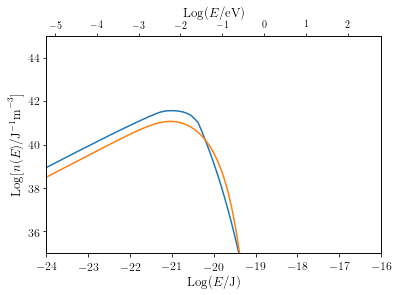

In [180]:
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

BXB_J = np.array([-22,-16])
AGN_J = np.array([-24,-16])
BXB_n = [35,45]
AGN_n = [35,45]
BXB_eV = np.array(BXB_J)+np.log10(6.24151e18)
AGN_eV = np.array(AGN_J)+np.log10(6.24151e18)
ax1.tick_params(axis='both', labelsize=12)
ax1.set_xlim(AGN_J)
ax1.set_ylim(AGN_n)
ax1.set_xlabel(r'$\mathrm{Log}(E/\mathrm{J})$',fontsize=13)
ax1.xaxis.set_label_position('bottom')

ax2.set_xlabel(r'$\mathrm{Log}(E/\mathrm{eV})$',fontsize=13)
ax2.xaxis.set_label_position('top')
ax2.set_xlim(AGN_eV)

ax1.set_ylabel(r'$\mathrm{Log}[n(E) / \mathrm{J^{-1}m}^{-3}]$',fontsize=13)

ax1.plot(np.log10(J),np.log10(Sy))
#ax1.plot(np.log10(J),smoothBrokenPLwEC(np.log10(J),oSy[0][0],oSy[0][1],oSy[0][2],oSy[0][3],oSy[0][4]))
ax1.plot(np.log10(J),smoothBrokenPLwEC(np.log10(J),41.5,-1.0,0.5,-21,-20.5))
fig.savefig('photonDensitySy.pdf')

In [184]:
CD[:100]

array([2.63e+28, 3.24e+28, 3.99e+28, 4.92e+28, 6.06e+28, 7.46e+28,
       9.19e+28, 1.13e+29, 1.39e+29, 1.72e+29, 2.11e+29, 2.60e+29,
       3.20e+29, 3.95e+29, 4.86e+29, 5.99e+29, 7.37e+29, 9.08e+29,
       1.12e+30, 1.38e+30, 1.70e+30, 2.09e+30, 2.57e+30, 3.17e+30,
       3.90e+30, 4.80e+30, 5.92e+30, 7.29e+30, 8.97e+30, 1.11e+31,
       1.36e+31, 1.68e+31, 2.06e+31, 2.54e+31, 3.13e+31, 3.86e+31,
       4.75e+31, 5.85e+31, 7.20e+31, 8.87e+31, 1.09e+32, 1.35e+32,
       1.66e+32, 2.04e+32, 2.51e+32, 3.09e+32, 3.81e+32, 4.69e+32,
       5.78e+32, 7.12e+32, 8.76e+32, 1.08e+33, 1.33e+33, 1.64e+33,
       2.01e+33, 2.48e+33, 3.05e+33, 3.76e+33, 4.62e+33, 5.69e+33,
       7.00e+33, 8.61e+33, 1.06e+34, 1.30e+34, 1.60e+34, 1.96e+34,
       2.41e+34, 2.95e+34, 3.61e+34, 4.41e+34, 5.39e+34, 6.57e+34,
       7.98e+34, 9.67e+34, 1.17e+35, 1.40e+35, 1.68e+35, 2.00e+35,
       2.36e+35, 2.77e+35, 3.21e+35, 3.68e+35, 4.17e+35, 4.64e+35,
       5.07e+35, 5.41e+35, 5.60e+35, 5.60e+35, 5.37e+35, 4.87e

/usr/lib/python3/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


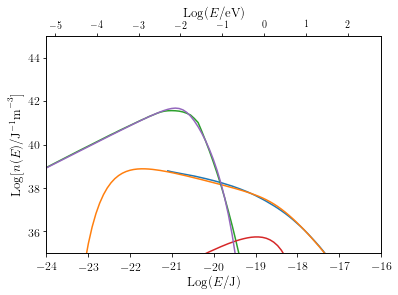

In [185]:
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

BXB_J = np.array([-25,-10])
BXB_n = [35,45]
BXB_eV = np.array(BXB_J)+np.log10(6.24151e18)
ax1.tick_params(axis='both', labelsize=12)
ax1.set_xlim(AGN_J)
ax1.set_ylim(AGN_n)
ax1.set_xlabel(r'$\mathrm{Log}(E/\mathrm{J})$',fontsize=13)
ax1.xaxis.set_label_position('bottom')

ax2.set_xlabel(r'$\mathrm{Log}(E/\mathrm{eV})$',fontsize=13)
ax2.xaxis.set_label_position('top')
ax2.set_xlim(AGN_eV)

ax1.set_ylabel(r'$\mathrm{Log}[n(E) / \mathrm{J^{-1}m}^{-3}]$',fontsize=13)

ax1.plot(np.log10(J),np.log10(IC))
#ax1.plot(np.log10(J),smoothBrokenPLw2EC(np.log10(J),oIC[0][0],oIC[0][1],oIC[0][2],oIC[0][3],-21,oIC[0][5]))
ax1.plot(np.log10(J),smoothBrokenPLw2EC(np.log10(J),37.5,0.5,2,-18.5,-22,-17))
ax1.plot(np.log10(J),np.log10(Sy))
ax1.plot(np.log10(J),np.log10(CD))
ax1.plot(np.log10(J),smoothBrokenPLwEC(np.log10(J),oSy[0][0],oSy[0][1],oSy[0][2],oSy[0][3],oSy[0][4]))

fig.savefig('photonDensityIC.pdf')

TypeError: funcSy() missing 1 required positional argument: 'd'

/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


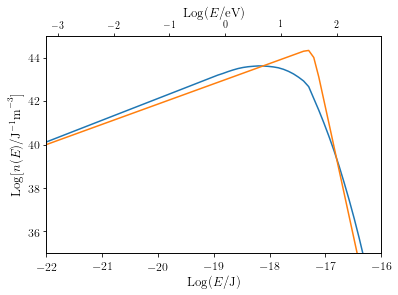

In [133]:
J,Sy,Br,IC,CD,Tot = np.loadtxt('photonDensity.txt',unpack=True,skiprows=4)

fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

BXB_J = np.array([-22,-16])
BXB_n = [35,45]
BXB_eV = np.array(BXB_J)+np.log10(6.24151e18)
ax1.tick_params(axis='both', labelsize=12)
ax1.set_xlim(BXB_J)
ax1.set_ylim(BXB_n)
ax1.set_xlabel(r'$\mathrm{Log}(E/\mathrm{J})$',fontsize=13)
ax1.xaxis.set_label_position('bottom')

ax2.set_xlabel(r'$\mathrm{Log}(E/\mathrm{eV})$',fontsize=13)
ax2.xaxis.set_label_position('top')
ax2.set_xlim(BXB_eV)

ax1.set_ylabel(r'$\mathrm{Log}[n(E) / \mathrm{J^{-1}m}^{-3}]$',fontsize=13)

ax1.plot(np.log10(J),np.log10(Sy))
#ax1.plot(np.log10(J[0:90]),func(np.log10(J[0:90]),o1[0][0],o1[0][1]))
#ax1.plot(np.log10(J[90:127]),func2(np.log10(J[90:127]),o2[0][0],
#                                   o2[0][1],o2[0][2],o2[0][3],o2[0][4],o2[0][5]))
ax1.plot(np.log10(J),funcSy(np.log10(J),o4[0][0],o4[0][1],o4[0][2],o4[0][3]))

fig.savefig('photonDensitySy.pdf')